Exercise 1

In [1]:
! python -m pip install "qiskit-experiments[extras]"
! pip install pylatexenc


# Exercise 1

[1.00e-06 3.10e-05 6.10e-05 9.10e-05 1.21e-04 1.51e-04]


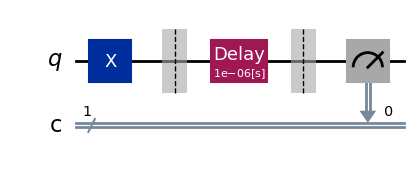

In [2]:
from qiskit_experiments.library import T1
from qiskit_ibm_runtime.fake_provider import FakePerth
from qiskit_aer import AerSimulator
import numpy as np

backend = AerSimulator.from_backend(FakePerth())

qubit0_t1 = FakePerth().qubit_properties(0).t1
delays = np.arange(1e-6, 3 * qubit0_t1, 3e-5)

exp = T1(physical_qubits=(0,), delays=delays)

print(delays)
exp.circuits()[0].draw(output="mpl", style="iqp")

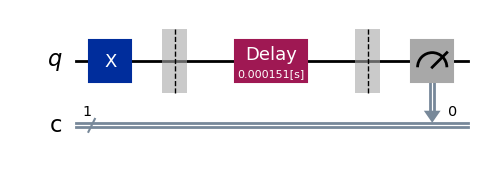

In [3]:
exp.circuits()[-1].draw(output="mpl", style="iqp")

JobStatus.DONE
AnalysisStatus.DONE


/Users/jiakaiwang/Documents/GitHub/physics707/.venv/lib/python3.13/site-packages/qiskit_ibm_runtime/fake_provider/local_service.py:233: UserWarning: Options {'execution': {'meas_type': 'classified'}} have no effect in local testing mode.
  warnings.warn(f"Options {options_copy} have no effect in local testing mode.")


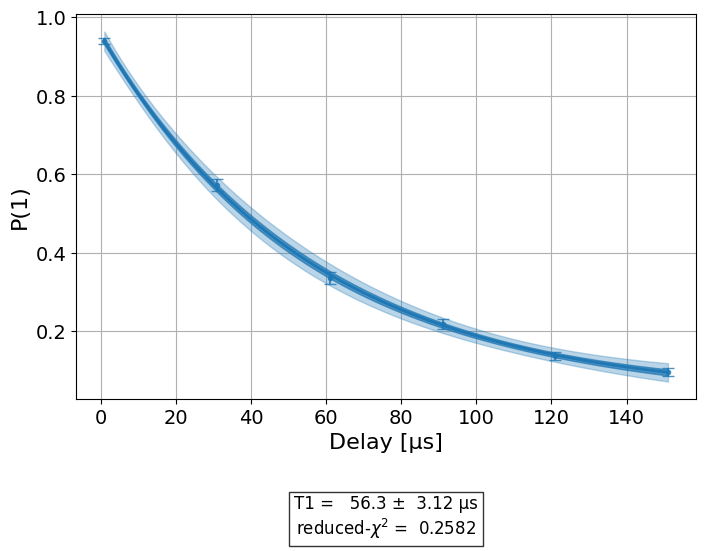

In [4]:
exp_data = exp.run(backend=backend).block_for_results()
print(exp_data.job_status())
print(exp_data.analysis_status())

display(exp_data.figure(0))

In [5]:
exp_data.analysis_results(dataframe=True)

,name,experiment,components,value,quality,backend,run_time,chisq,unit
cdfa3aae,@Parameters_T1Analysis,T1,[Q0],CurveFitResult:\n - fitting method: least_squa...,good,aer_simulator_from(fake_perth),None,None,None
4bd85a1e,T1,T1,[Q0],(5.63+/-0.31)e-05,good,aer_simulator_from(fake_perth),None,0.258243,s


In [6]:
print(exp_data.analysis_results("T1").value.nominal_value)
print(exp_data.analysis_results("T1").value.std_dev)

5.627341229007367e-05
3.118439667974762e-06


In [7]:
print(exp_data.artifacts("fit_summary").data)

CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 1
  * F_exp_decay(x) = amp * exp(-x/tau) + base
 - success: True
 - number of function evals: 24
 - degree of freedom: 3
 - chi-square: 0.7747297470985552
 - reduced chi-square: 0.25824324903285173
 - Akaike info crit.: -6.282002958556365
 - Bayesian info crit.: -6.9067245508722
 - init params:
  * amp = 0.8419512195121951
  * tau = 6.543791884571561e-05
  * base = 0.09707317073170732
 - fit params:
  * amp = 0.923181486361483 ± 0.016751437104093214
  * tau = 5.627341229007367e-05 ± 3.118439667974762e-06
  * base = 0.03270357666899442 ± 0.01636152480508549
 - correlations:
  * (tau, base) = -0.9114142309408813
  * (amp, base) = -0.8665196567946983
  * (amp, tau) = 0.7153560023589939


In [8]:
print(exp_data.data(0))

{'job_id': 'c3ad5c1b-4a88-418a-9729-2bd16f329166', 'meas_level': 2, 'meas_return': 'single', 'counts': {'1': 962, '0': 62}, 'memory': ['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', 

In [9]:
print(exp_data.metadata)

{'physical_qubits': [0], 'device_components': [<Qubit(Q0)>], 'meas_level': <MeasLevel.CLASSIFIED: 2>, '_source': {'class': 'qiskit_experiments.framework.experiment_data.ExperimentData', 'metadata_version': 1, 'qiskit_version': {'qiskit': '1.2.4', 'qiskit-experiments': '0.8.0'}}}


Shots set to 1000, measurement level set to {exp.run_options.get('meas_level')}
Transpile options are Options(optimization_level=3, scheduling_method='asap', basis_gates=['x', 'sx', 'rz'])
Experiment options are Options(max_circuits=None, delays=array([1.00e-06, 5.10e-05, 1.01e-04, 1.51e-04, 2.01e-04, 2.51e-04,
       3.01e-04, 3.51e-04, 4.01e-04, 4.51e-04, 5.01e-04, 5.51e-04]))


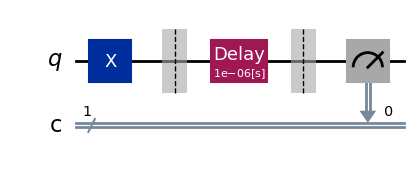

In [10]:
from qiskit.qobj.utils import MeasLevel

exp.set_run_options(shots=1000,
                    meas_level=MeasLevel.CLASSIFIED)
print(f"Shots set to {exp.run_options.get('shots')}, "
      "measurement level set to {exp.run_options.get('meas_level')}")

exp.set_transpile_options(scheduling_method='asap',
                          optimization_level=3,
                          basis_gates=["x", "sx", "rz"])
print(f"Transpile options are {exp.transpile_options}")

exp = T1(physical_qubits=(0,), delays=delays)
new_delays=np.arange(1e-6, 600e-6, 50e-6)
exp.set_experiment_options(delays=new_delays)
print(f"Experiment options are {exp.experiment_options}")

from qiskit_experiments.library import StandardRB

exp = StandardRB(physical_qubits=(0,),
                lengths=list(range(1, 300, 30)),
                seed=123,
                backend=backend)
exp.analysis.set_options(gate_error_ratio=None)

from qiskit_experiments.framework import ParallelExperiment

child_exp1 = T1(physical_qubits=(2,), delays=delays)
child_exp2 = StandardRB(physical_qubits=(3,1), lengths=np.arange(1,100,10), num_samples=2)
parallel_exp = ParallelExperiment([child_exp1, child_exp2])

parallel_exp.component_experiment(0).circuits()[0].draw(output="mpl", style="iqp")

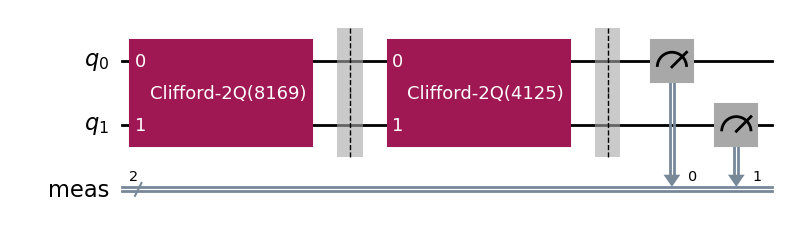

In [11]:
parallel_exp.component_experiment(1).circuits()[0].draw(output="mpl", style="iqp")

In [12]:
parallel_exp.component_experiment(0).analysis.set_options(plot = True)

# This should print out what we set because it's the same option
print(parallel_exp.analysis.component_analysis(0).options.get("plot"))

True


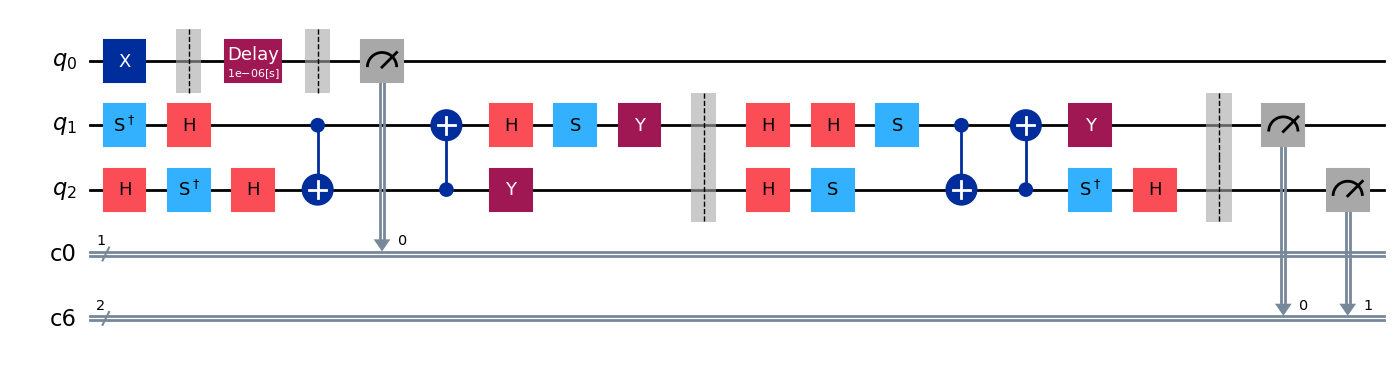

In [13]:
parallel_exp.circuits()[0].draw(output="mpl", style="iqp")

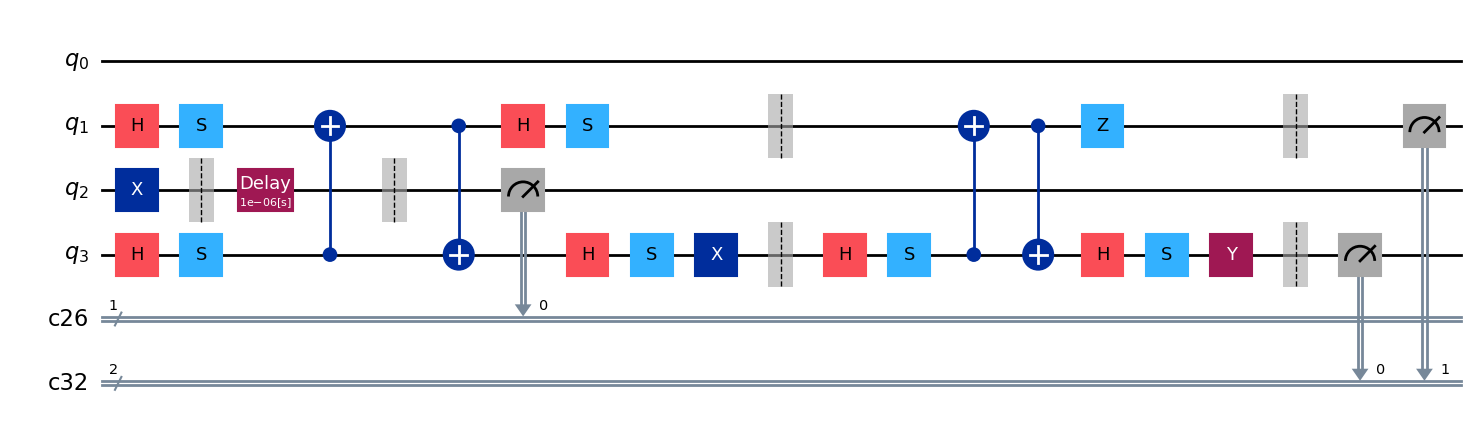

In [14]:
parallel_exp._transpiled_circuits()[0].draw(output="mpl", style="iqp")

# Exercise 2

In [15]:
import numpy as np
from qiskit_experiments.library import StandardRB, InterleavedRB
from qiskit_experiments.framework import ParallelExperiment, BatchExperiment
import qiskit.circuit.library as circuits

# For simulation
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime.fake_provider import FakePerth

backend = AerSimulator.from_backend(FakePerth())

/Users/jiakaiwang/Documents/GitHub/physics707/.venv/lib/python3.13/site-packages/qiskit_ibm_runtime/fake_provider/local_service.py:233: UserWarning: Options {'execution': {'meas_type': 'classified'}} have no effect in local testing mode.
  warnings.warn(f"Options {options_copy} have no effect in local testing mode.")


Gate error ratio: {'x': 1.0, 'rz': 0.0, 'sx': 1.0}


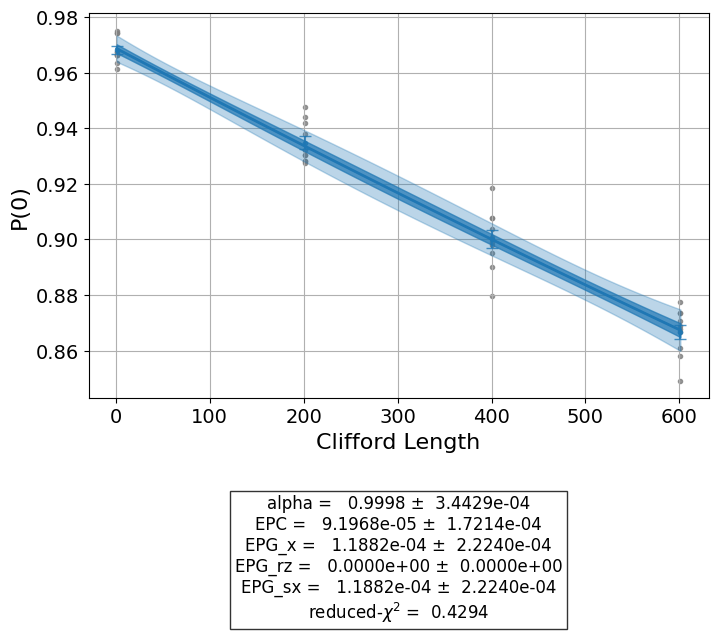

AnalysisResult
- name: @Parameters_RBAnalysis
- value: CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 1
  * F_rb_decay(x) = a * alpha ** x + b
 - success: True
 - number of function evals: 145
 - degree of freedom: 1
 - chi-square: 0.4294079329120192
 - reduced chi-square: 0.4294079329120192
 - Akaike info crit.: -2.926569121668585
 - Bayesian info crit.: -4.767686038308914
 - init params:
  * a = 0.4683857585925005
  * alpha = 0.9995929922338932
  * b = 0.5
 - fit params:
  * a = 0.9687801637793524 ± 1.7211405700201863
  * alpha = 0.9998160645037144 ± 0.0003442872960093491
  * b = 3.955463969430581e-14 ± 1.721744911838395
 - correlations:
  * (a, b) = -0.9999996384026353
  * (alpha, b) = -0.9998842669130071
  * (a, alpha) = 0.9998756322706697
- quality: good
- extra: <2 items>
- device_components: ['Q0']
- verified: False
AnalysisResult
- name: alpha
- value: 0.99982+/-0.00034
- χ²: 0.4294079329120192
- quality: good
- extra: <2 items>
- device_components: [

In [16]:
lengths = np.arange(1, 800, 200)
num_samples = 10
seed = 1010
qubits = [0]

# Run an RB experiment on qubit 0
exp1 = StandardRB(qubits, lengths, num_samples=num_samples, seed=seed)
expdata1 = exp1.run(backend).block_for_results()
results1 = expdata1.analysis_results()

# View result data
print("Gate error ratio: %s" % expdata1.experiment.analysis.options.gate_error_ratio)
display(expdata1.figure(0))
for result in results1:
    print(result)

/Users/jiakaiwang/Documents/GitHub/physics707/.venv/lib/python3.13/site-packages/qiskit_ibm_runtime/fake_provider/local_service.py:233: UserWarning: Options {'execution': {'meas_type': 'classified'}} have no effect in local testing mode.
  warnings.warn(f"Options {options_copy} have no effect in local testing mode.")
/Users/jiakaiwang/Documents/GitHub/physics707/.venv/lib/python3.13/site-packages/qiskit_ibm_runtime/fake_provider/local_service.py:233: UserWarning: Options {'execution': {'meas_type': 'classified'}} have no effect in local testing mode.
  warnings.warn(f"Options {options_copy} have no effect in local testing mode.")


Gate error ratio: {'cx': 1.0}


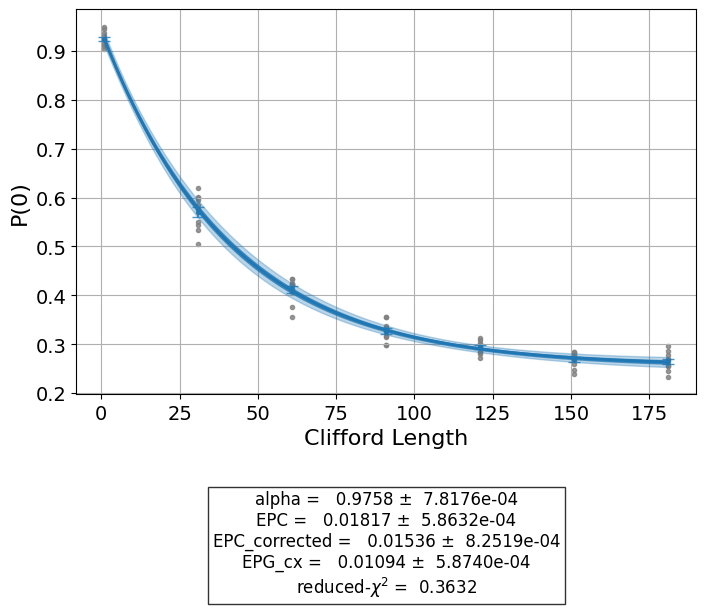

AnalysisResult
- name: @Parameters_RBAnalysis
- value: CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 1
  * F_rb_decay(x) = a * alpha ** x + b
 - success: True
 - number of function evals: 20
 - degree of freedom: 4
 - chi-square: 1.452658251665156
 - reduced chi-square: 0.363164562916289
 - Akaike info crit.: -5.007604958095712
 - Bayesian info crit.: -5.169874510929772
 - init params:
  * a = 0.6885423916642802
  * alpha = 0.9790211454464613
  * b = 0.25
 - fit params:
  * a = 0.685069386757092 ± 0.006040400894132243
  * alpha = 0.9757758497641561 ± 0.0007817595578060931
  * b = 0.25540087059663236 ± 0.004347218718628495
 - correlations:
  * (alpha, b) = -0.8061398404345621
  * (a, b) = -0.5976212885152535
  * (a, alpha) = 0.3434097378822185
- quality: good
- extra: <2 items>
- device_components: ['Q1', 'Q2']
- verified: False
AnalysisResult
- name: alpha
- value: 0.9758+/-0.0008
- χ²: 0.363164562916289
- quality: good
- extra: <2 items>
- device_components

In [17]:
lengths_2_qubit = np.arange(1, 200, 30)
lengths_1_qubit = np.arange(1, 800, 200)
num_samples = 10
seed = 1010
qubits = (1, 2)

# Run a 1-qubit RB experiment on qubits 1, 2 to determine the error-per-gate of 1-qubit gates
single_exps = BatchExperiment(
    [
        StandardRB((qubit,), lengths_1_qubit, num_samples=num_samples, seed=seed)
        for qubit in qubits
    ]
)
expdata_1q = single_exps.run(backend).block_for_results()

# Run an RB experiment on qubits 1, 2
exp_2q = StandardRB(qubits, lengths_2_qubit, num_samples=num_samples, seed=seed)

# Use the EPG data of the 1-qubit runs to ensure correct 2-qubit EPG computation
exp_2q.analysis.set_options(epg_1_qubit=expdata_1q.analysis_results())

# Run the 2-qubit experiment
expdata_2q = exp_2q.run(backend).block_for_results()

# View result data
print("Gate error ratio: %s" % expdata_2q.experiment.analysis.options.gate_error_ratio)
display(expdata_2q.figure(0))
for result in expdata_2q.analysis_results():
    print(result)

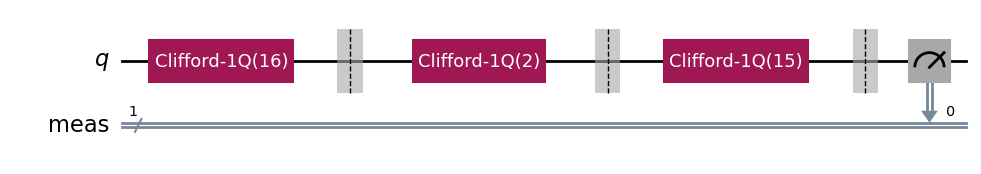

In [18]:
# Run an RB experiment on qubit 0
exp = StandardRB(physical_qubits=(0,), lengths=[2], num_samples=1, seed=seed)
c = exp.circuits()[0]
c.draw(output="mpl", style="iqp")

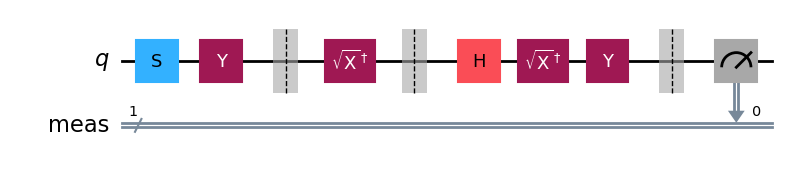

In [19]:
c.decompose().draw(output="mpl", style="iqp")

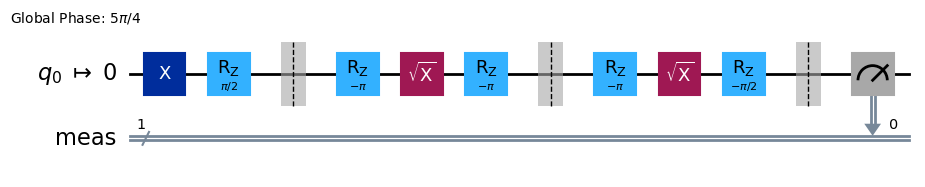

In [20]:
from qiskit import transpile
transpile(c, backend, **vars(exp.transpile_options)).draw(output="mpl", style="iqp", idle_wires=False)

/Users/jiakaiwang/Documents/GitHub/physics707/.venv/lib/python3.13/site-packages/qiskit_ibm_runtime/fake_provider/local_service.py:233: UserWarning: Options {'execution': {'meas_type': 'classified'}} have no effect in local testing mode.
  warnings.warn(f"Options {options_copy} have no effect in local testing mode.")


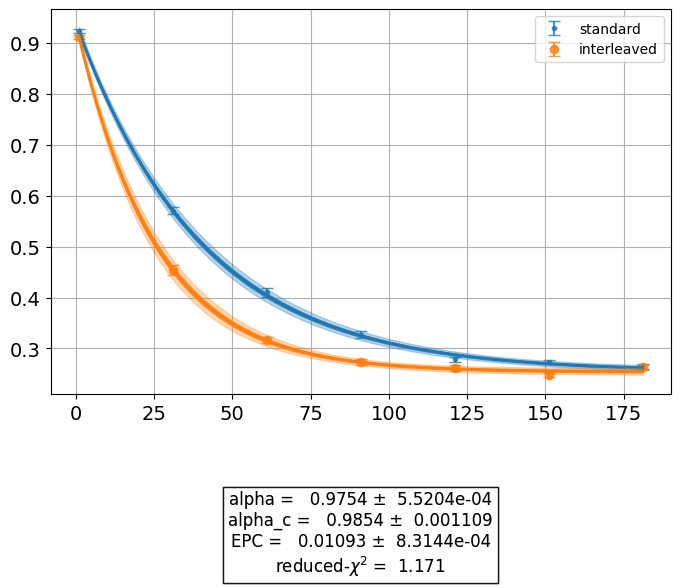

AnalysisResult
- name: @Parameters_InterleavedRBAnalysis
- value: CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 2
  * F_standard(x) = a * alpha ** x + b
  * F_interleaved(x) = a * (alpha_c * alpha) ** x + b
 - success: True
 - number of function evals: 30
 - degree of freedom: 10
 - chi-square: 11.712818110437803
 - reduced chi-square: 1.1712818110437804
 - Akaike info crit.: 5.502770684856769
 - Bayesian info crit.: 8.059000003317802
 - init params:
  * a = 0.6837728701490803
  * alpha = 0.9790759205493518
  * b = 0.25
  * alpha_c = 0.9947161782079473
 - fit params:
  * a = 0.6850948633952778 ± 0.0037900947832574475
  * alpha = 0.9753681562408301 ± 0.0005520425737408989
  * b = 0.25452485926206475 ± 0.002216493416383934
  * alpha_c = 0.9854203941207883 ± 0.001108584945422786
 - correlations:
  * (alpha, b) = -0.5694281769683713
  * (a, b) = -0.4673465754245955
  * (b, alpha_c) = -0.24318978423722107
  * (alpha, alpha_c) = -0.1636205012949185
  * (a, alpha_c

In [21]:
lengths = np.arange(1, 200, 30)
num_samples = 10
seed = 1010
qubits = (1, 2)

# The interleaved gate is the CX gate
int_exp2 = InterleavedRB(
    circuits.CXGate(), qubits, lengths, num_samples=num_samples, seed=seed)

int_expdata2 = int_exp2.run(backend).block_for_results()
int_results2 = int_expdata2.analysis_results()
# View result data
display(int_expdata2.figure(0))
for result in int_results2:
    print(result)

# Number of samples to generate for each sequence length
# Seed because it's computer simulation
# 2-qubit gate is more error prone / is longer
# The interleaved has more error becuase it's more gates, the two-qubit gate error is associated with the difference in those two exponential decay rates

# Exercise 3

In [22]:
! pip install qutip qutip_qip matplotlib qiskit qutip-qtrl tqdm qiskit_aer

In [85]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qutip_qip.qiskit import QiskitCircuitSimulator,QiskitPulseSimulator
import numpy as np
from typing import List,Optional,Union ,Dict, Any
import matplotlib.pyplot as plt
import qutip
from qutip import basis, fidelity,sigmax, sigmay, sigmaz,identity,rand_unitary,tensor,mesolve,Qobj, Bloch
from qutip_qip.operations import  rx,ry,rz,cz_gate,expand_operator
from typing import List
from tqdm import tqdm
from qutip_qip.device import Processor, Model
from qiskit import QuantumCircuit
from qiskit.compiler import transpile
import qiskit
import numpy as np
import uuid
import random
from collections import Counter
import qutip
import qiskit
from qutip import basis
from qutip_qip.circuit import QubitCircuit
from qutip_qip.circuit.circuitsimulator import CircuitResult
from qutip_qip.device import Processor
from qutip_qip.qiskit import QiskitSimulatorBase
from qutip_qip.qiskit.job import Job
from qutip_qip.qiskit.converter import convert_qiskit_circuit
from qiskit.providers import BackendV1,BackendV2, Options
from qiskit.providers.models import QasmBackendConfiguration
from qiskit.result import Result, Counts
from qiskit.result.models import ExperimentResult, ExperimentResultData
from qiskit.quantum_info import Statevector, DensityMatrix
from qiskit.circuit import QuantumCircuit
from qiskit.qobj import QobjExperimentHeader
from qiskit.transpiler import Target
from qiskit.circuit.library import RXGate, RZGate, CZGate
from qiskit.circuit import Parameter
from qiskit.providers.provider import ProviderV1
# import warnings
# warnings.filterwarnings("ignore", category=DeprecationWarning)
class MyProvider(ProviderV1):
    def __init__(self):
        super().__init__()

    def backends(self, name=None, **kwargs):
        # Return a list of available backends
        # For simplicity, return an empty list or a list with your custom backend
        return [MyQiskitPulseSimulator()] if name is None else []

class MyBackendV2(BackendV2):
    def __init__(self):
        self.shots = 1024
    def run(self, qiskit_circuit: QuantumCircuit, **run_options) -> Job:
        self.set_options(
            shots=(
                run_options["shots"]
                if "shots" in run_options
                else self._default_options().shots
            ),
            allow_custom_gate=(
                run_options["allow_custom_gate"]
                if "allow_custom_gate" in run_options
                else self._default_options().allow_custom_gate
            ),
        )
        
        job_id = str(uuid.uuid4())
        job = Job(
            backend=self,
            job_id=job_id,
            result=self._run_job(job_id, qiskit_circuit),
        )
        return job

    def _sample_shots(self, count_probs: dict) -> Counts:
        shots = self.shots
        samples = random.choices(
            list(count_probs.keys()), list(count_probs.values()), k=shots
        )
        return Counts(Counter(samples))

    def _get_probabilities(self, state):
        if state.type == "oper":
            return state.diag()
        return np.array([np.abs(coef) ** 2 for coef in state])

class MyQiskitPulseSimulator(MyBackendV2):
    def __init__(self, processor: Processor, configuration=None, **fields):
        self._provider = MyProvider() 
        self.processor = processor
        self.name = 'fake NA backend'
        self.version = '0.1'
        super().__init__( **fields)

        target = Target(description='fake NA backend')
        target.add_instruction(CZGate(),{(0,1):None})
        theta = Parameter('theta')
        target.add_instruction(RXGate(theta),{(0,):None},name='rx0')
        target.add_instruction(RXGate(theta),{(1,):None},name='rx1')
        target.add_instruction(RZGate(theta),{(0,):None},name='rz0')
        target.add_instruction(RZGate(theta),{(1,):None},name='rz1')
        self._target = target
                        
    def _parse_results(
        self, final_state: qutip.Qobj, job_id: str, qutip_circuit: QubitCircuit
    ) -> qiskit.result.Result:
        count_probs = {}
        counts = None

        # calculate probabilities of required states
        if final_state:
            for i, prob in enumerate(self._get_probabilities(final_state)):
                if not np.isclose(prob, 0):
                    count_probs[hex(i)] = prob
            # sample the shots from obtained probabilities
            counts = self._sample_shots(count_probs)

        exp_res_data = ExperimentResultData(
            counts=counts,
            statevector=(
                Statevector(data=final_state.full())
                if final_state.type == "ket"
                else DensityMatrix(data=final_state.full())
            ),
        )

        header = QobjExperimentHeader.from_dict(
            {
                "name": (
                    qutip_circuit.name
                    if hasattr(qutip_circuit, "name")
                    else ""
                ),
                "n_qubits": qutip_circuit.N,
            }
        )

        exp_res = ExperimentResult(
            shots=self.shots,
            success=True,
            data=exp_res_data,
            header=header,
        )

        result = Result(
            backend_name='fake NA backend',
            backend_version='0.1',
            qobj_id=id(qutip_circuit),
            job_id=job_id,
            success=True,
            results=[exp_res],
        )

        return result

    def _run_job(self, job_id: str, 
                #  qutip_circuit: QubitCircuit
                qiskit_circuit: QuantumCircuit
                 ) -> Result:
        zero_state = self.processor.generate_init_processor_state()

        # self.processor.load_circuit(qutip_circuit)
        self.processor.load_circuit(qiskit_circuit)
        result = self.processor.run_state(zero_state)

        final_state = self.processor.get_final_circuit_state(result.states[-1])

        qutip_circ = convert_qiskit_circuit(
            qiskit_circuit,
            allow_custom_gate=self.options.allow_custom_gate,
        )

        return self._parse_results(
            final_state=final_state, job_id=job_id, qutip_circuit=qutip_circ
        )

    @classmethod
    def _default_options(cls):
        return Options(shots=1024, allow_custom_gate=True)
    
    @property
    def max_circuits(self):
        return 1000
    
    @property
    def target(self):
        return self._target
    
GROUND = basis(4, 0)
EXCITED = basis(4, 1)
LEAKAGE = basis(4, 2)
RYDBERG = basis(4, 3)

class minimal_processor(Processor):
    def __init__(self,
                 num_qubits=2,
                 Omega_01 = 9.999385781382449,
                 delta_1 = -9.997619824080692,
                 gamma_r = 0,# 1 / 540
                 ):
        self.Omega_01 = Omega_01
        self.delta_1= delta_1
        self.basis_gates=['rx','rz','cz']
        self.qbt_dim=4
        self.model=Model(num_qubits=num_qubits,
                         dims=[self.qbt_dim for _ in range(num_qubits)])
        self.num_qubits=num_qubits
        self.get_c_ops(gamma_r)

    def evolve(self, state: qutip.Qobj, name: str, param: Optional[float], qbts: List[int]):
        if name == 'rx':
            return self._evolve_rx(state, param, qbts)
        elif name == 'rz':
            return self._evolve_rz(state, param, qbts)
        elif name == 'cz':
            return self._evolve_cz(state, qbts)
        else:
            raise ValueError(f"Unsupported gate: {name}")

    def _evolve_rx(self, state: qutip.Qobj, param: float, qbts: List[int]):
        Omega_01 = self.Omega_01
        return mesolve(
            H=self.id_wrap(Omega_01 / 2 * (GROUND * EXCITED.dag() + EXCITED * GROUND.dag()), qbts[0]),
            rho0=state,
            tlist=np.array([0, param / 10]),
            c_ops=self.collapse_ops,
            options={'store_final_state': True}
        )

    def _evolve_rz(self, state: qutip.Qobj, param: float, qbts: List[int]):
        delta_1 = self.delta_1
        H = self.id_wrap(delta_1 * EXCITED * EXCITED.dag(), qbts[0])
        return mesolve(
            H=H,
            rho0=state,
            tlist=np.array([0, param / 10]),
            c_ops=self.collapse_ops,
            options={'store_final_state': True}
        )

    def _evolve_cz(self, state: qutip.Qobj, qbts: List[int]):
        t_tot = 0.540  # microsecond, which is the total duration of the gate protocol
        B = 200 * 2 * np.pi  # interaction strength
        omegaMax = 17 * 2 * np.pi  # MHz
        deltaMax = 23 * 2 * np.pi  # MHz
        tau = 0.175 * t_tot
        a = np.exp(-(t_tot / 4) ** 4 / tau ** 4)

        def Rabi_frequency(t, args):
            return (t < t_tot / 2) * omegaMax * (np.exp(-(t - t_tot / 4) ** 4 / tau ** 4) - a) / (1 - a) + \
                   (t >= t_tot / 2) * omegaMax * (np.exp(-(t - 3 * t_tot / 4) ** 4 / tau ** 4) - a) / (1 - a)

        def Detunning(t, args):
            return (t < t_tot / 2) * (-1) * deltaMax * np.cos(2 * np.pi * t / t_tot) + \
                   (t >= t_tot / 2) * deltaMax * np.cos(2 * np.pi * t / t_tot)

        H = []
        for idx in qbts:
            H.append([self.id_wrap(0.5 * RYDBERG * EXCITED.dag() + 0.5 * EXCITED * RYDBERG.dag(), idx), Rabi_frequency])
            H.append([self.id_wrap(RYDBERG * RYDBERG.dag(), idx), Detunning])

        H.append(self.id_wrap(B * tensor(RYDBERG, RYDBERG) * tensor(RYDBERG, RYDBERG).dag(), qbts))  # This assumes the system involves two qubit only.

        state = self._evolve_rz(state, np.pi, [qbts[0]]).states[-1]
        state = mesolve(
            H=H,
            rho0=state,
            tlist=np.array([0, t_tot]),
            c_ops=self.collapse_ops,
            options={'store_final_state': True, 'nsteps': 10000}
        ).states[-1]
        return self._evolve_rz(state, np.pi, [qbts[1]])

    def invert_idx(self,idx):
        return self.num_qubits-1-idx        
    
    def run_state(self,
                  init_state:qutip.Qobj) -> qutip.solver.Result:
        if init_state.isket:
            assert init_state.dims == [[self.qbt_dim for _ in range(self.num_qubits)],[1 for _ in range(self.num_qubits)]]
        else:
            assert init_state.dims == [[self.qbt_dim for _ in range(self.num_qubits)],[self.qbt_dim for _ in range(self.num_qubits)]]
        state = init_state
        for ins in tqdm(self.qiskit_circ_transpiled.data,'Simulating gate'):
            name = ins.operation.name    
            param = next(iter(ins.operation.params), None)
            qbts = [self.invert_idx(qubit._index) for qubit in ins.qubits]
            result = self.evolve(state, name, param, qbts)            
            state = result.final_state
        return result
    
    def generate_init_processor_state(self)->qutip.Qobj:
        # Always initialize in zero
        return tensor([basis(self.qbt_dim, 0) for _ in range(self.num_qubits)])
    
    def id_wrap(self,
                op:qutip.Qobj,
                idx:Union[int,List[int]])->qutip.Qobj:
        if isinstance(idx,int):
            idx = [idx]
        return expand_operator(oper=op,
                               dims=[self.qbt_dim for _ in range(self.num_qubits)],
                               targets=idx)

    
    def get_c_ops(self,gamma_r):
        L0 = np.sqrt(1/16 * gamma_r) * (GROUND * RYDBERG.dag())
        L1 = np.sqrt(1/16 * gamma_r) * (EXCITED * RYDBERG.dag())
        Ld = np.sqrt(7/8 * gamma_r) * (LEAKAGE * RYDBERG.dag())
        single_q_c_ops = [L0, L1, Ld]

        self.collapse_ops = []
        for q in range(self.num_qubits):
            for c_op in single_q_c_ops:
                self.collapse_ops.append(self.id_wrap(c_op,
                                                      q))
    
    def load_circuit(self,
                     qiskit_circuit:qiskit.QuantumCircuit)->None:
        self.qiskit_circ_transpiled = transpile(qiskit_circuit,basis_gates=self.basis_gates)
        # self.qiskit_circ_transpiled = qiskit_circ_transpiled
    
    def get_final_circuit_state(self,state:qutip.Qobj)->qutip.Qobj:
        rho = state
        if rho.isket:
            rho = qutip.ket2dm(rho)
        rho_arr = rho.full()
        rho_reshaped = rho_arr.reshape(*[self.qbt_dim for _ in range(self.num_qubits*2)])
        # print(rho_reshaped.shape)
        rho_reshaped_2lvl = rho_reshaped[tuple(slice(0, 2) for _ in range(2 * self.num_qubits))]
        # print(rho_reshaped_2lvl.shape)
        return Qobj(rho_reshaped_2lvl.reshape(2**self.num_qubits , 2**self.num_qubits), dims=[[2] * self.num_qubits, [2] * self.num_qubits])
    

/var/folders/9k/z8bpg3hj3d9841ggs75xmwxw0000gn/T/ipykernel_45101/1063662691.py:30: DeprecationWarning: qiskit.providers.models is deprecated since Qiskit 1.2 and will be removed in Qiskit 2.0. With the removal of Qobj, there is no need for these schema-conformant objects. If you still need to use them, it could be because you are using a BackendV1, which is also deprecated in favor of BackendV2.
  from qiskit.providers.models import QasmBackendConfiguration


In [86]:
processor = minimal_processor(2,gamma_r=0)
pulse_backend = MyQiskitPulseSimulator(processor)


lengths = np.arange(1, 800, 200)
num_samples = 10
seed = 1010
qubits = [0]

# Run an RB experiment on qubit 0
exp1 = StandardRB(qubits, lengths, num_samples=num_samples, seed=seed)
expdata1 = exp1.run(pulse_backend).block_for_results()
results1 = expdata1.analysis_results()

# View result data
print("Gate error ratio: %s" % expdata1.experiment.analysis.options.gate_error_ratio)
# display(expdata1.figure(0))
# for result in results1:
#     print(result)

/var/folders/9k/z8bpg3hj3d9841ggs75xmwxw0000gn/T/ipykernel_45101/1063662691.py:44: DeprecationWarning: The class ``qiskit.providers.provider.Provider`` is deprecated as of qiskit 1.1. It will be removed no earlier than 3 months after the release date. The abstract Provider and ProviderV1 classes are deprecated and will be removed in 2.0. You can just remove it as the parent class and a `get_backend` method that returns the backends from `self.backend`.
  super().__init__()


IBMInputValueError: 'The instruction rz on qubits (0,) is not supported by the target system. Circuits that do not match the target hardware definition are no longer supported after March 4, 2024. See the transpilation documentation (https://docs.quantum.ibm.com/guides/transpile) for instructions to transform circuits and the primitive examples (https://docs.quantum.ibm.com/guides/primitives-examples) to see this coupled with operator transformations.'

In [101]:
target = Target(description='fake NA backend')
target.add_instruction(CZGate(),{(0,1):None})
theta = Parameter('theta')
target.add_instruction(RXGate(theta),{(0,):None},name='rx0')
target.add_instruction(RXGate(theta),{(1,):None},name='rx1')
target.add_instruction(RZGate(theta),{(0,):None},name='rz0')
target.add_instruction(RZGate(theta),{(1,):None},name='rz1')

TranspilerError: "The number of qubits for Instruction(name='rx', num_qubits=1, num_clbits=0, params=[Parameter(theta)]) does not match the number of qubits in the properties dictionary: (0, 1)"

In [97]:
target.instruction_supported('rz',(0,))

False

In [98]:
target.instruction_supported('rz1',(1,))

True

In [99]:
target = Target(description='fake NA backend')
target.add_instruction(CZGate(),{(0,1):None})
theta = Parameter('theta')
target.add_instruction(RXGate(theta),{(0,):None},name='rx')
target.add_instruction(RXGate(theta),{(1,):None},name='rx')
target.add_instruction(RZGate(theta),{(0,):None},name='rz')
target.add_instruction(RZGate(theta),{(1,):None},name='rz')

AttributeError: Instruction rx is already in the target